In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.display.max_columns=100
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


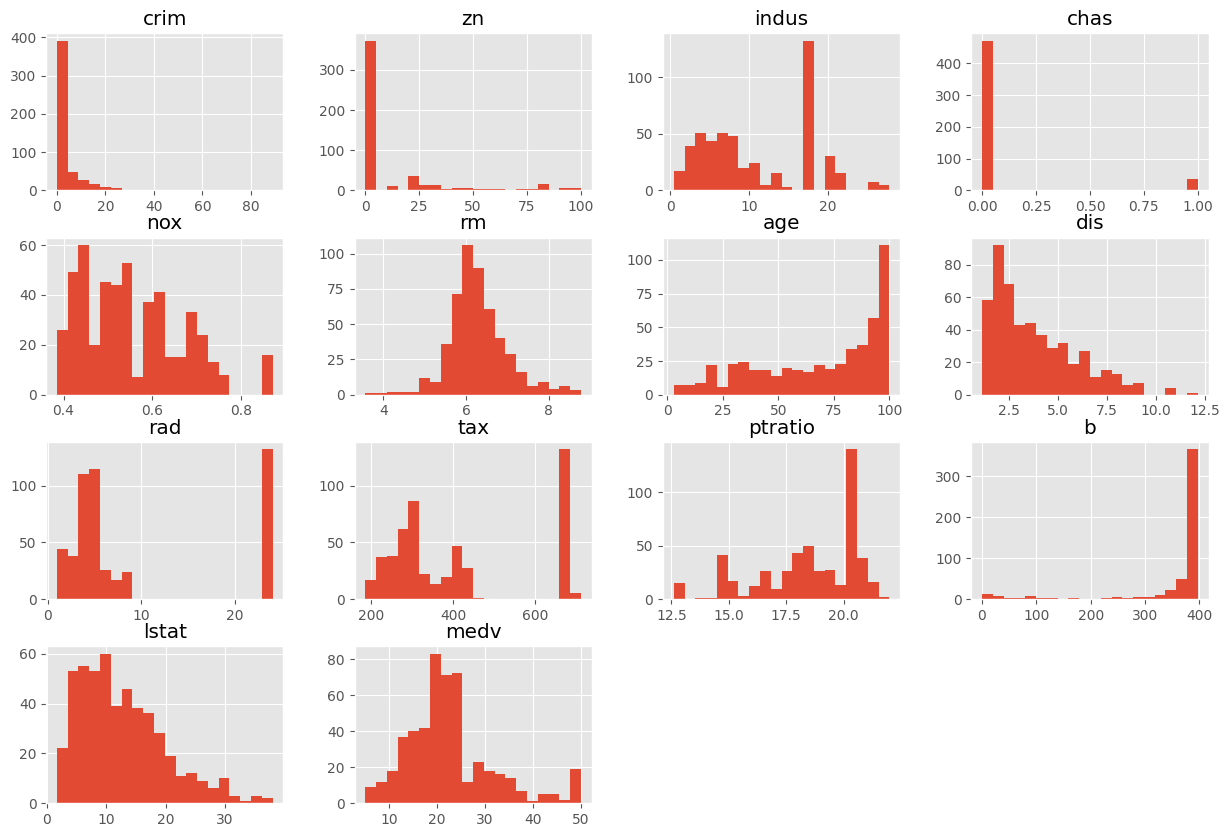

In [4]:
fig,ax=plt.subplots(figsize=(15,10))
df.hist(bins=20,ax=ax)
plt.show()

In [5]:
df=df[df['medv']!=50]

In [6]:
df.corr()['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.686634
zn         0.404608
dis        0.368813
b          0.364928
chas       0.074803
crim      -0.450115
rad       -0.476296
age       -0.492915
ptratio   -0.518641
nox       -0.524451
tax       -0.572442
indus     -0.600005
lstat     -0.759837
Name: medv, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='medv')
y=df['medv']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,1000,2000],
            'learning_rate':[0.01,0.1,0.15],
            'max_depth':[None,1,3,5,7,9]}

grid_search_cv=GridSearchCV(estimator=model,param_grid=param_grid,cv=3,verbose=10,scoring='neg_mean_absolute_error')
grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(best_model)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 1/3; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-7.661 total time=   0.0s
[CV 2/3; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 2/3; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-7.823 total time=   0.0s
[CV 3/3; 1/54] START learning_rate=0.01, max_depth=None, n_estimators=100.......
[CV 3/3; 1/54] END learning_rate=0.01, max_depth=None, n_estimators=100;, score=-8.464 total time=   0.0s
[CV 1/3; 2/54] START learning_rate=0.01, max_depth=None, n_estimators=1000......
[CV 1/3; 2/54] END learning_rate=0.01, max_depth=None, n_estimators=1000;, score=-1.920 total time=   1.7s
[CV 2/3; 2/54] START learning_rate=0.01, max_depth=None, n_estimators=1000......
[CV 2/3; 2/54] END learning_rate=0.01, max_depth=None, n_estimators=1000;, score=-1.989 total time=   1.0s
[

[CV 3/3; 15/54] END learning_rate=0.01, max_depth=7, n_estimators=2000;, score=-2.411 total time=   2.2s
[CV 1/3; 16/54] START learning_rate=0.01, max_depth=9, n_estimators=100.........
[CV 1/3; 16/54] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=-7.671 total time=   0.0s
[CV 2/3; 16/54] START learning_rate=0.01, max_depth=9, n_estimators=100.........
[CV 2/3; 16/54] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=-7.824 total time=   0.0s
[CV 3/3; 16/54] START learning_rate=0.01, max_depth=9, n_estimators=100.........
[CV 3/3; 16/54] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=-8.460 total time=   0.0s
[CV 1/3; 17/54] START learning_rate=0.01, max_depth=9, n_estimators=1000........
[CV 1/3; 17/54] END learning_rate=0.01, max_depth=9, n_estimators=1000;, score=-1.967 total time=   1.2s
[CV 2/3; 17/54] START learning_rate=0.01, max_depth=9, n_estimators=1000........
[CV 2/3; 17/54] END learning_rate=0.01, max_depth=9, n_estimators=1000;, 

[CV 3/3; 30/54] END learning_rate=0.1, max_depth=5, n_estimators=2000;, score=-2.389 total time=   1.1s
[CV 1/3; 31/54] START learning_rate=0.1, max_depth=7, n_estimators=100..........
[CV 1/3; 31/54] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=-1.922 total time=   0.0s
[CV 2/3; 31/54] START learning_rate=0.1, max_depth=7, n_estimators=100..........
[CV 2/3; 31/54] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=-1.943 total time=   0.0s
[CV 3/3; 31/54] START learning_rate=0.1, max_depth=7, n_estimators=100..........
[CV 3/3; 31/54] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=-2.456 total time=   0.0s
[CV 1/3; 32/54] START learning_rate=0.1, max_depth=7, n_estimators=1000.........
[CV 1/3; 32/54] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=-1.913 total time=   0.6s
[CV 2/3; 32/54] START learning_rate=0.1, max_depth=7, n_estimators=1000.........
[CV 2/3; 32/54] END learning_rate=0.1, max_depth=7, n_estimators=1000;, score=

[CV 3/3; 45/54] END learning_rate=0.15, max_depth=3, n_estimators=2000;, score=-2.347 total time=   1.1s
[CV 1/3; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 1/3; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=-2.032 total time=   0.0s
[CV 2/3; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 2/3; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=-1.953 total time=   0.0s
[CV 3/3; 46/54] START learning_rate=0.15, max_depth=5, n_estimators=100.........
[CV 3/3; 46/54] END learning_rate=0.15, max_depth=5, n_estimators=100;, score=-2.326 total time=   0.0s
[CV 1/3; 47/54] START learning_rate=0.15, max_depth=5, n_estimators=1000........
[CV 1/3; 47/54] END learning_rate=0.15, max_depth=5, n_estimators=1000;, score=-2.024 total time=   0.5s
[CV 2/3; 47/54] START learning_rate=0.15, max_depth=5, n_estimators=1000........
[CV 2/3; 47/54] END learning_rate=0.15, max_depth=5, n_estimators=1000;, 

In [10]:
#best_params={'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 2000}

[learning_curve] Training set sizes: [ 31  62  93 125 156 187 219 250 281 313]
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................., score=(train=-0.001, test=-3.608) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.697) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.680) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.417) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.362) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.3s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.389) total time=   0.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.9s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.409) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.5s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.077) total time=   0.5s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.1s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.054) total time=   0.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.8s remaining:    0.0s


[CV] END ................., score=(train=-0.001, test=-2.026) total time=   0.6s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.001, test=-3.513) total time=   0.3s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.001, test=-2.646) total time=   0.3s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.001, test=-2.633) total time=   0.4s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.001, test=-2.687) total time=   0.4s
[CV] START .....................................................................
[CV] END ................., score=(train=-0.001, test=-2.769) total time=   0.4s
[CV] START .....................................................................
[CV] END ................., 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.2s finished


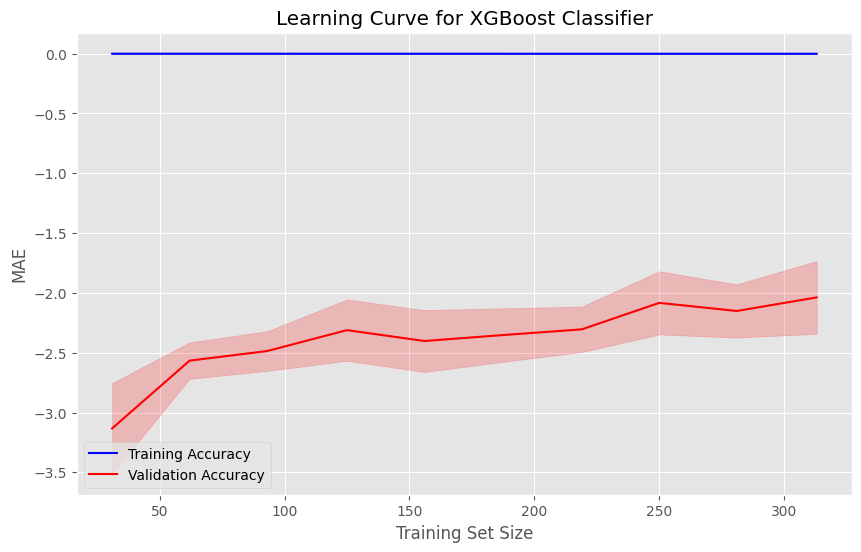

In [11]:
from sklearn.model_selection import learning_curve

train_sizes=np.linspace(0.1,1,10)

train_sizes,train_scores,test_scores=learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    train_sizes=train_sizes,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=10
)


train_scores_mean=np.mean(train_scores,axis=1)
train_scores_std=np.std(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
test_scores_std=np.std(test_scores,axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
plt.xlabel('Training Set Size')
plt.ylabel('MAE')
plt.title('Learning Curve for XGBoost Classifier')
plt.legend(loc='best')
plt.grid(True)
plt.show()

[0]	validation_0-mae:17.95767	validation_1-mae:17.69125
[1]	validation_0-mae:15.32925	validation_1-mae:15.14097
[2]	validation_0-mae:13.08967	validation_1-mae:12.98958
[3]	validation_0-mae:11.18188	validation_1-mae:11.18500
[4]	validation_0-mae:9.56192	validation_1-mae:9.66863
[5]	validation_0-mae:8.19146	validation_1-mae:8.41460
[6]	validation_0-mae:7.01597	validation_1-mae:7.33127
[7]	validation_0-mae:6.01893	validation_1-mae:6.47734
[8]	validation_0-mae:5.16887	validation_1-mae:5.73595
[9]	validation_0-mae:4.44210	validation_1-mae:5.11454
[10]	validation_0-mae:3.82028	validation_1-mae:4.58998
[11]	validation_0-mae:3.29510	validation_1-mae:4.14659
[12]	validation_0-mae:2.84616	validation_1-mae:3.78215
[13]	validation_0-mae:2.45840	validation_1-mae:3.47929
[14]	validation_0-mae:2.14013	validation_1-mae:3.24581
[15]	validation_0-mae:1.87250	validation_1-mae:3.07986
[16]	validation_0-mae:1.64121	validation_1-mae:2.94825
[17]	validation_0-mae:1.45304	validation_1-mae:2.82321
[18]	validat

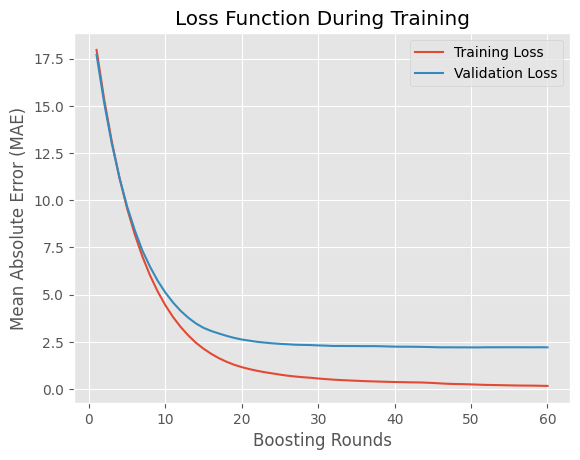

In [12]:
import xgboost as xgb

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3)


# Fit the model and monitor the loss function on the training and validation sets
eval_set = [(X_train, y_train), (X_valid, y_valid)]
best_model.fit(X_train, y_train, eval_set=eval_set, eval_metric='mae', early_stopping_rounds=10, verbose=True)

# Access the training history
results = best_model.evals_result()
train_loss = results['validation_0']['mae']
val_loss = results['validation_1']['mae']
epochs = range(1, len(train_loss) + 1)

# Plot the loss function during training
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Loss Function During Training')
plt.legend()
plt.show()

In [13]:
test_prediction=best_model.predict(X_test)
from sklearn import metrics


r2_test=metrics.r2_score(test_prediction,y_test)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)

print(r2_test,mae_test,rmse_test)

0.9019238687239459 1.8147197120043697 2.4420486616991415


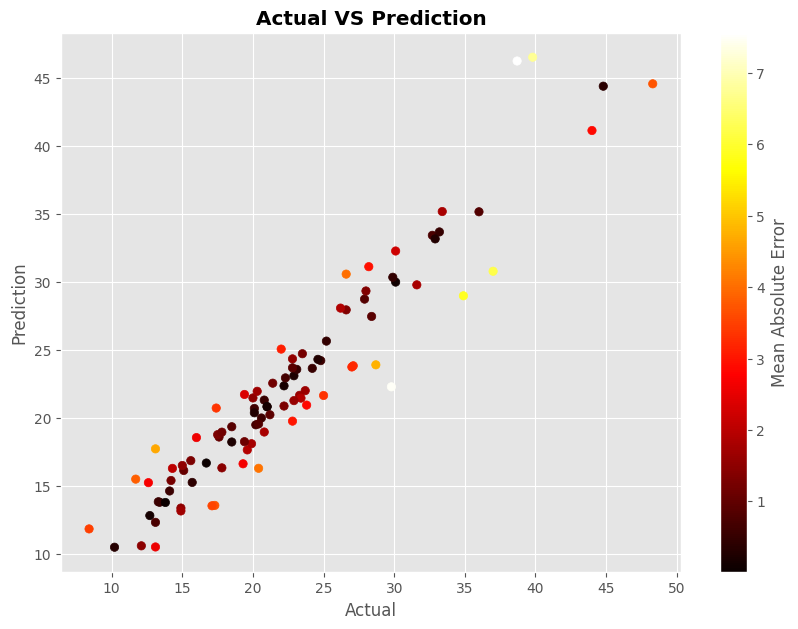

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(x=y_test,y=test_prediction,c=(y_test-test_prediction).abs(),cmap='hot')
plt.title('Actual VS Prediction',fontweight='bold')
plt.colorbar().set_label('Mean Absolute Error')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

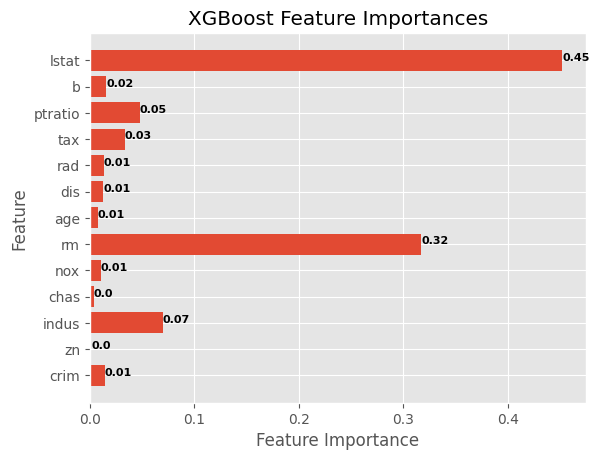

In [15]:
weights=best_model.feature_importances_
features=best_model.feature_names_in_

plt.barh(y=features, width=weights)
for i in range(len(features)):
    plt.text(weights[i],i,weights[i].round(2),fontweight='bold',size=8)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importances')
plt.show()

# Error Analysis

In [16]:
test=X_test
test['Actual']=y_test
test['Prediction']=test_prediction

test['Error']=test['Actual']-test['Prediction']

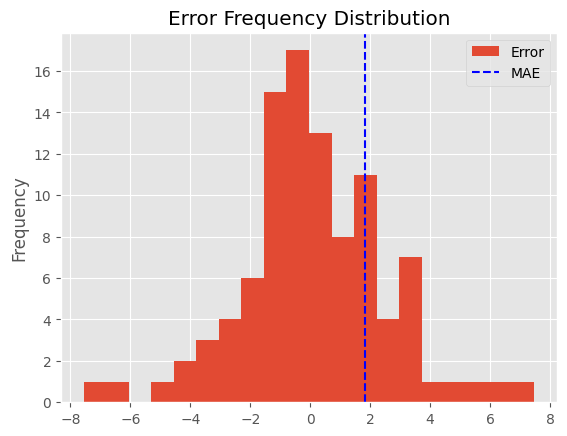

In [17]:
mae=test['Error'].abs().mean()
rmse=test['Error'].std()

test['Error'].plot.hist(bins=20)
plt.axvline(mae,ls='--',color='blue',label='MAE')
plt.title('Error Frequency Distribution')
plt.legend()
plt.show()

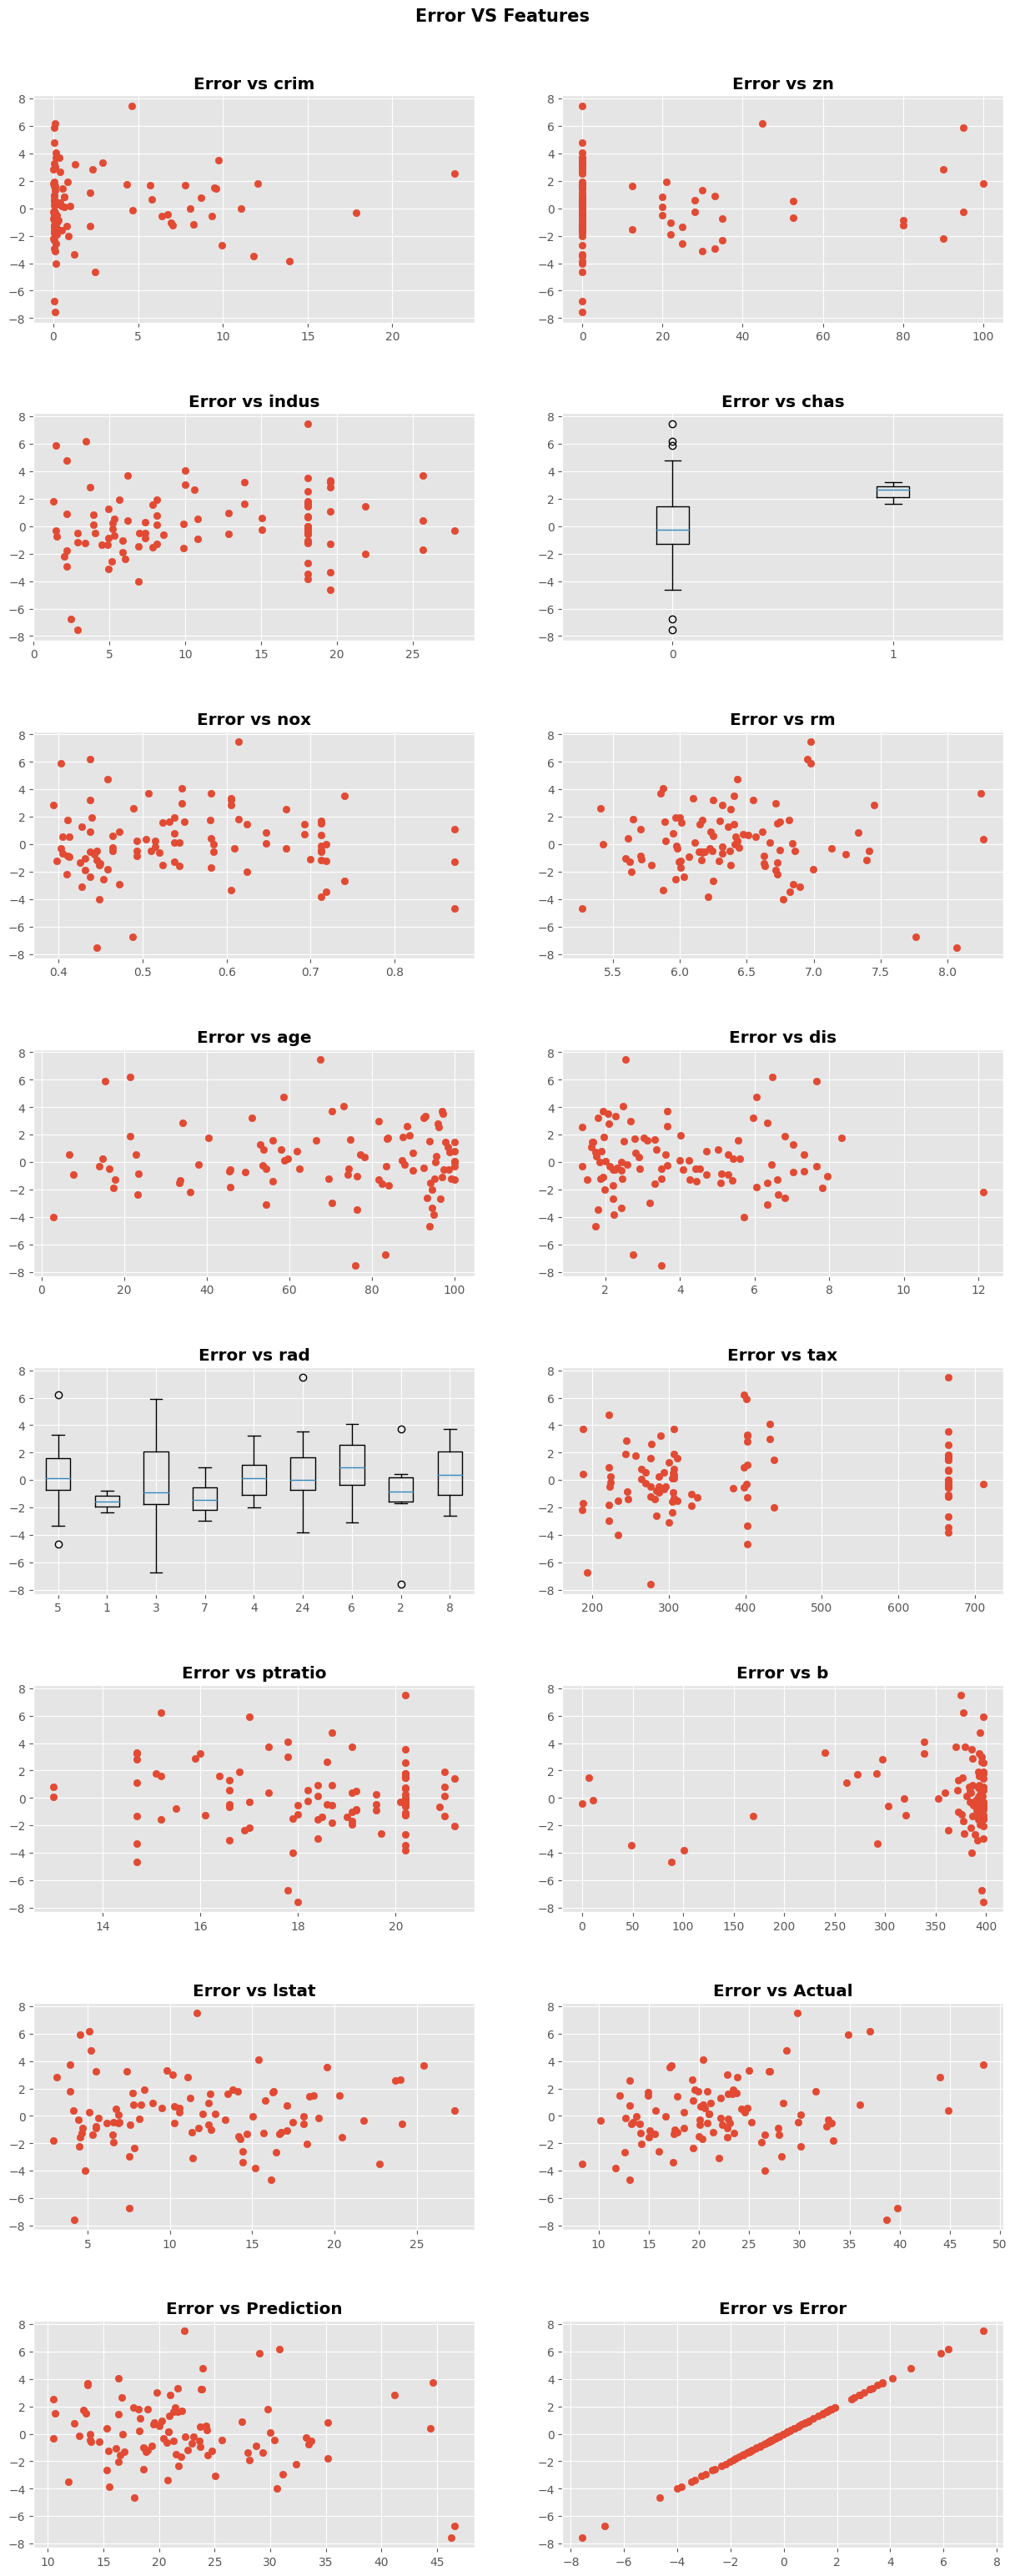

In [18]:
fig,axes=plt.subplots(8,2,figsize=(15,35))

for ax,col in zip(axes.ravel(),test.columns):
    if test[col].nunique()>=15:
        ax.scatter(x=test[col],y=test['Error'])
        ax.set_title(f'Error vs {col}',fontweight='bold')
    else:
        ax.boxplot(labels=test[col].unique(),x=[test[test[col]==label]['Error'] for label in test[col].unique()])
        ax.set_title(f'Error vs {col}',fontweight='bold')
        
plt.suptitle('Error VS Features',fontweight='bold',size=15)
plt.subplots_adjust(hspace=0.4,top=0.95)
plt.show()